## Customized Vector Plots in Python

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
sjer_roads_path = './data/spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp'
sjer_roads = gpd.read_file(sjer_roads_path)

# View data type
print(type(sjer_roads['RTTYP']))
sjer_roads.head()

<class 'pandas.core.series.Series'>


,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110454239066,N 14th St,M,S1400,"LINESTRING (-120.27227 37.11615, -120.27244 37..."
1,110454239052,N 11th St,M,S1400,"LINESTRING (-120.26788 37.11667, -120.26807 37..."
2,110454239056,N 12th St,M,S1400,"LINESTRING (-120.27053 37.11749, -120.27045 37..."
3,110454239047,N 10th St,M,S1400,"LINESTRING (-120.26703 37.11735, -120.26721 37..."
4,110454243091,N Westberry Blvd,M,S1400,"LINESTRING (-120.10122 36.96524, -120.10123 36..."


In [3]:
# View unique attributes for each road in the data
print(sjer_roads['RTTYP'].unique())

['M' None 'S' 'C']


Change the roads with a RTTYP attribute of **None** to **Unknown**

In [4]:
sjer_roads['RTTYP'].replace(np.nan, 'Unknown', inplace = True)
print(sjer_roads['RTTYP'].unique())

['M' 'Unknown' 'S' 'C']


If you plot your data using the standard geopandas **.plot()**, geopandas will select colors for your lines. You can add a legend using the **legend=True** argument. 

However, the legend is composed of circles representing each line type rather than a line. You also don’t have full control over what color is applied to which line, line width and other symbology attributes.

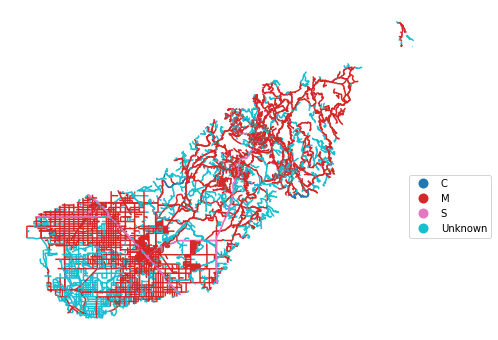

In [5]:
fig, ax = plt.subplots(figsize = (14, 6))
sjer_roads.plot(column = 'RTTYP', 
               categorical = True, 
               legend = True, 
               ax = ax)
# Adjust legent location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 0.5))
ax.set_axis_off()

plt.show()

## Plot Color by Attribute

In [6]:
# Create a dict where you assign each attribute value to a particular color
roadPalette = {'M':'blue', 
               'S':'green', 
               'C':'purple', 
               'Unknown':'grey'}
roadPalette

{'M': 'blue', 'S': 'green', 'C': 'purple', 'Unknown': 'grey'}

Next, you loop through each attribute value and plot the lines with that attribute value using the color specified in the dictionary. To ensure your legend generates properly, you add a **label =** argument to your plot call. The label value will be the attribute value that you used to plot.

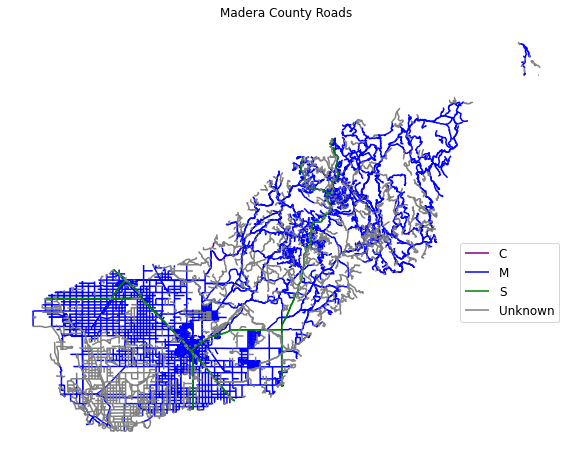

In [7]:
fig, ax = plt.subplots(figsize = (10, 10))

# Loop through earch attribute type and plot it using the assigned colors
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    data.plot(color = color, 
             ax = ax, 
             label = ctype)
ax.legend(bbox_to_anchor = (1.0, 0.5), prop = {'size':12})
ax.set(title = 'Madera County Roads')

ax.set_axis_off()
plt.show()

## Adjust Line Width by Attribute
Similar to how you adjust colors, you can create a dictionary to adjust line widths. Then you can call **dictionaryName[ctype]** where dictionaryName is a dictionary of what line width you want to assign to each attribute value and ctype is the attribute value.

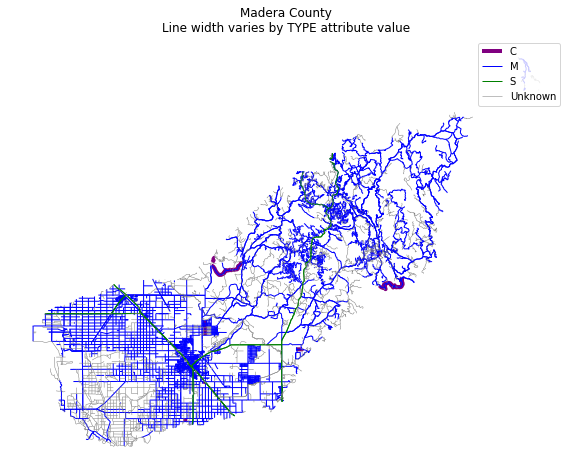

In [8]:
lineWidths = {'M':1, 'S':1, 'C':4, 'Unknown':0.5}

fig, ax = plt.subplots(figsize = (10, 10))

for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    data.plot(color = color, 
              ax = ax, 
              label = ctype, 
              linewidth = lineWidths[ctype])

ax.set(title = 'Madera County\nLine width varies by TYPE attribute value')    
ax.legend()
ax.set_axis_off()
plt.show()

## Customize Plot Legend

When you add a legend, you use the following elements to customize legend labels and colors:

* **loc=(how-far-right, how-far-above-0)**: specify an x and Y location of the plot Or generally specify the location e.g. ‘bottom right’, ‘top’, ‘top right’, etc. If you use numeric values the first value is the position to the RIGHT of the plot and the second is the vertical position (how far above 0). Otherwise you can provide text for example “lower right” or “upper left”.
* **fontsize**: the size of the fonts used in the legend
* **frameon**: Boolean Values: True of False - if you want a box around your legend use True

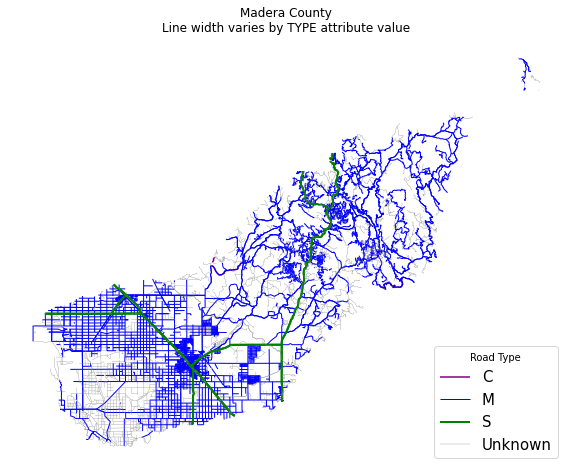

In [12]:
lineWidths = {'M':1, 'S':2, 'C':1.5, 'Unknown':0.3}

fig, ax = plt.subplots(figsize = (10, 10))

for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype
    data.plot(color = color, 
              ax = ax, 
              linewidth = lineWidths[ctype], 
              label = label)
    
ax.set(title = 'Madera County\nLine width varies by TYPE attribute value')

# Place legend in the lower right corner of the plot
ax.legend(loc = 'lower right', 
          fontsize = 15, 
          frameon = True, 
          title = "Road Type")

ax.set_axis_off()
plt.show()

Addust both plot colors and line widths.

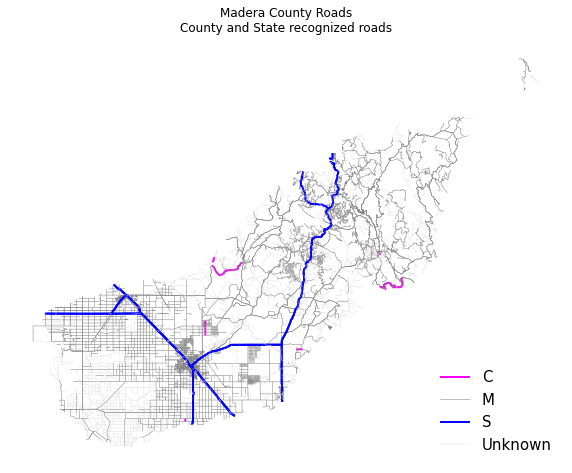

In [18]:
roadPalette = {'M':'grey', 'S':'blue', 'C':'magenta', 'Unknown':'lightgrey'}
lineWidths = {'M':0.5, 'S':2, 'C':2, 'Unknown':0.3}

fig, ax = plt.subplots(figsize = (10, 10))
for ctype, data in sjer_roads.groupby('RTTYP'):
    data.plot(color = roadPalette[ctype], 
              ax = ax, 
              linewidth = lineWidths[ctype], 
              label = ctype)

ax.set(title = 'Madera County Roads\nCounty and State recognized roads')
ax.legend(loc = 'lower right', 
          fontsize = 15, 
          frameon = False)

ax.set_axis_off()

plt.show()

## Add a Point Shapefile to the Map

In [21]:
sjer_plots_path = './data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp'
sjer_plots = gpd.read_file(sjer_plots_path)
sjer_plots.head()

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)


In [22]:
print(sjer_plots['plot_type'].unique())

['trees' 'grass' 'soil']


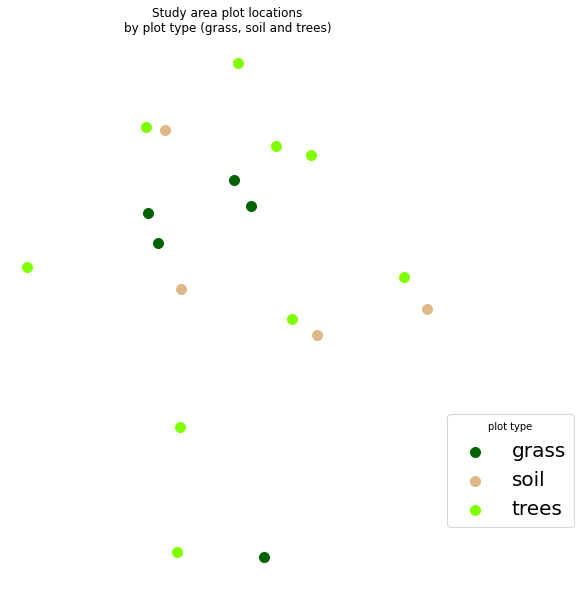

In [23]:
pointsPalette = {'trees':'chartreuse', 'grass':'darkgreen', 'soil':'burlywood'}

fig, ax = plt.subplots(figsize = (10, 10))
for ctype, data in sjer_plots.groupby('plot_type'):
    data.plot(ax = ax, 
              color = pointsPalette[ctype], 
              label = ctype, 
              markersize = 100)
    
ax.set(title = 'Study area plot locations\nby plot type (grass, soil and trees)')

ax.legend(fontsize = 20, 
          loc = (1, 0.1), 
          title = 'plot type', 
          frameon = True)

ax.set_axis_off()

plt.show()

Overlay points on top of roads. In this example, the projection for the roads layer has to match the projection of the SJER plot locations.

In [24]:
# Reproject data
sjer_roads_utm = sjer_roads.to_crs(sjer_plots.crs)

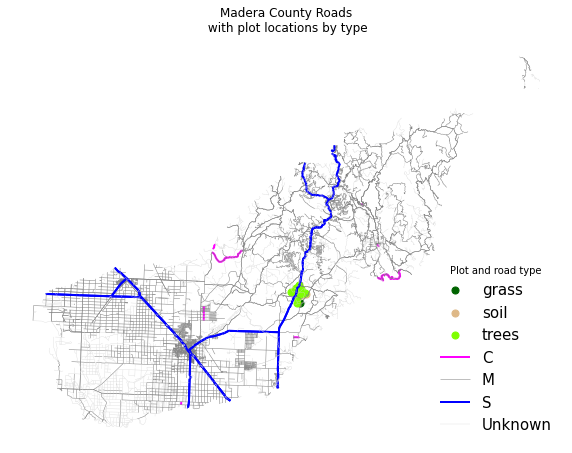

In [31]:
fig, ax = plt.subplots(figsize = (10, 10))

for point_ctype, data in sjer_plots.groupby('plot_type'):
    data.plot(ax = ax, 
              color = pointsPalette[point_ctype], 
              label = point_ctype, 
              markersize = 50)

for road_ctype, data in sjer_roads_utm.groupby('RTTYP'):
    data.plot(color = roadPalette[road_ctype], 
              ax = ax, 
              linewidth = lineWidths[road_ctype], 
              label = road_ctype)

ax.set(title = 'Madera County Roads\n with plot locations by type')

ax.legend(loc = ('lower right'), 
          fontsize = 15, 
          frameon = False, 
          title = 'Plot and road type')

ax.set_axis_off()

plt.show()